In [34]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf

In [35]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [36]:
import os
train_data = []
train_label = []
for k in os.listdir("C://Users//Pratik Patre//Downloads//cifar-10-batches-py"):
    if k[0:4] == 'data':
        d = unpickle("C://Users//Pratik Patre//Downloads//cifar-10-batches-py/" + k)
        for keys,values in d.items():
            if keys == b'labels':
                label = values
            if keys == b'data':
                data = values
        for i in label:
            train_label.append(i)
        for j in data:
            train_data.append(j)
        
    if k[0:4] == 'test':
        test = unpickle("C://Users//Pratik Patre//Downloads//cifar-10-batches-py/" + k)

In [37]:
train_data = np.asarray(train_data)

In [50]:
train_data[1]

array([ 0.60392159,  0.49411765,  0.41176471, ...,  0.54509807,
        0.55686277,  0.56470591], dtype=float32)

In [38]:
train_label = np.asarray(train_label)

In [39]:
train_data.shape

(50000, 3072)

In [40]:
train_label.shape

(50000,)

In [41]:
train_data = train_data.astype('float32')
train_data /= 255

In [42]:
batch_size = 512

num_classes = 10

epochs = 20
train_label = keras.utils.to_categorical(train_label, num_classes)

In [43]:
for keys,values in test.items():
    if keys == b'labels':
        test_label = values
    if keys == b'data':
        test_data = values

In [44]:
test_label = np.asarray(test_label)

In [45]:
test_data.shape

(10000, 3072)

In [46]:
test_label.shape

(10000,)

In [47]:
test_data = test_data.astype('float32')
test_data /= 255

In [48]:
test_label = keras.utils.to_categorical(test_label, num_classes)

In [49]:
model = Sequential()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.add(Dense(1536, activation='relu', input_shape=(3072,)))

model.add(Dropout(0.2))

model.add(Dense(1536, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(train_data, train_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_data, test_label))

score = model.evaluate(test_data, test_label, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1536)              2360832   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                15370     
Total params: 7,096,330
Trainable params: 7,096,330
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 98s 2ms/step - loss: 2.0

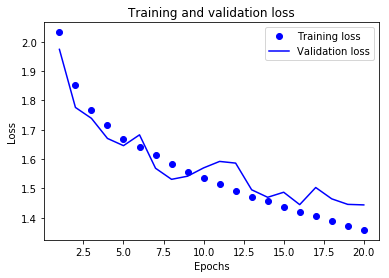

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

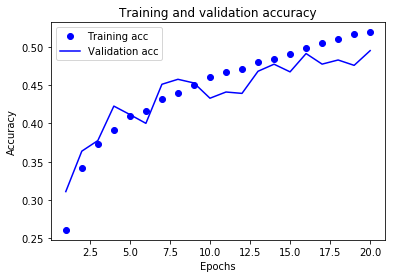

In [54]:
plt.clf()   # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()